In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
superstore=pd.read_excel('superstoreDataset.xlsx' )
null_value=superstore[superstore.isnull().any(axis=1)]
null_value

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,State,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
7,98,613,2011-06-17,High,22,905.080,0.09,Regular Air,127.70,42.76,6.22,Carl Jackson,Arizona,Corporate,Office Supplies,Storage & Organization,"SAFCO Mobile Desk Side File, Wire Frame",Small Box,NaN,2011-06-18
8,103,643,2011-03-24,High,21,2781.820,0.07,Express Air,-695.26,138.14,35.00,Monica Federle,Arizona,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,NaN,2011-03-25
71,988,7110,2011-08-07,Low,22,6396.200,0.02,Regular Air,1902.24,276.20,24.49,Grant Carroll,Arizona,Corporate,Furniture,Chairs & Chairmats,SAFCO Arco Folding Chair,Large Box,NaN,2011-08-11
213,3419,24387,2011-08-10,Critical,17,6048.180,0.04,Delivery Truck,1418.36,349.45,60.00,Bryan Mills,Ohio,Small Business,Furniture,Tables,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,Jumbo Drum,NaN,2011-08-10
274,4306,30658,2011-03-26,Medium,44,6040.220,0.05,Regular Air,-942.50,138.14,35.00,Charles McCrossin,Ohio,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,NaN,2011-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,6015,42628,2011-05-05,Not Specified,4,1199.336,0.01,Delivery Truck,224.80,349.45,60.00,Ken Lonsdale,California,Consumer,Furniture,Tables,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,Jumbo Drum,NaN,2011-05-07
7508,7124,50822,2012-02-07,Medium,6,1635.290,0.10,Regular Air,7.92,276.20,24.49,Carol Darley,California,Small Business,Furniture,Chairs & Chairmats,SAFCO Arco Folding Chair,Large Box,NaN,2012-02-08
7833,261,1824,2009-05-04,Critical,39,10656.260,0.06,Regular Air,3116.54,276.20,24.49,Becky Pak,California,Corporate,Furniture,Chairs & Chairmats,SAFCO Arco Folding Chair,Large Box,NaN,2009-05-05
8160,728,5222,2009-05-26,Not Specified,40,14451.750,0.01,Delivery Truck,4503.63,349.45,60.00,Tonja Turnell,Arizona,Consumer,Furniture,Tables,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,Jumbo Drum,NaN,2009-05-27


In [128]:
(superstore.isnull()).any()


Row ID                  False
Order ID                False
Order Date              False
Order Priority          False
Order Quantity          False
Sales                   False
Discount                False
Ship Mode               False
Profit                  False
Unit Price              False
Shipping Cost           False
Customer Name           False
State                   False
Customer Segment        False
Product Category        False
Product Sub-Category    False
Product Name            False
Product Container       False
Product Base Margin      True
Ship Date               False
dtype: bool

In [129]:
(superstore['Product Base Margin']).isnull().sum()

63

In [130]:
#2.
s1 = superstore.groupby(['State','Product Category','Product Sub-Category'])['Sales'].sum()
s1

State       Product Category  Product Sub-Category        
Arizona     Furniture         Bookcases                        30555.400
                              Chairs & Chairmats               87513.820
                              Office Furnishings               32240.890
                              Tables                           82308.974
            Office Supplies   Appliances                       35602.830
                                                                 ...    
Washington  Office Supplies   Storage & Organization           84089.270
            Technology        Computer Peripherals             41300.150
                              Copiers and Fax                  65251.560
                              Office Machines                 182127.210
                              Telephones and Communication    129312.217
Name: Sales, Length: 136, dtype: float64

In [131]:
#3. 
mask=superstore[superstore['State'] == 'Texas']
TexGroup = mask.groupby ('Product Sub-Category')['Profit'].sum()
TexGroup



Product Sub-Category
Appliances                         11652.8500
Binders and Binder Accessories     42302.4390
Bookcases                           3665.8700
Chairs & Chairmats                  7003.6500
Computer Peripherals               20843.6500
Copiers and Fax                    21353.3760
Envelopes                           8118.2200
Labels                              2673.2700
Office Furnishings                 25463.7100
Office Machines                   107003.0228
Paper                               5257.0200
Pens & Art Supplies                 1336.0400
Rubber Bands                         -54.6600
Scissors, Rulers and Trimmers      -1968.4200
Storage & Organization             13942.9200
Tables                             -5581.9944
Telephones and Communication       58149.2170
Name: Profit, dtype: float64

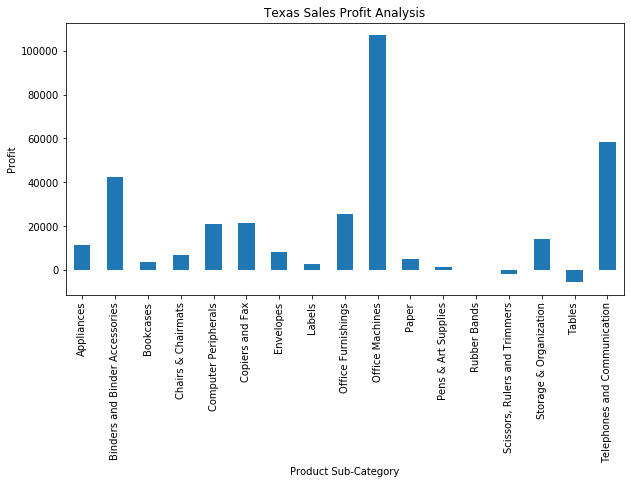

In [132]:
import matplotlib.pyplot as plt
TexChart = TexGroup.plot.bar(figsize = (10,5)).set(title='Texas Sales Profit Analysis',
                                                  ylabel='Profit')
# TexChart.set_title('Texas Sales Profit Analysis')
# TexChart.set_ylabel(' Profit ')

In [133]:
#4.
superstore['Order Date'].dtype


dtype('<M8[ns]')

In [134]:
# superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
# superstore['Order Date'].dtype
#always df ['colname'] = pd.to_datetime(df['colname'])

In [135]:
SalesbyYear = superstore.pivot_table(index = superstore['Order Date'].dt.year, columns = 'State', values = 'Sales',
aggfunc = 'sum')
SalesbyYear

State,Arizona,California,Florida,New Mexico,New York,Ohio,Texas,Washington
Order Date,,,,,,,,
2009,219858.2495,845564.7990,370323.0195,668393.2800,905639.4555,190377.8000,782526.4175,226456.4345
2010,139667.8945,751815.0360,369738.9585,508428.0885,772618.4795,200177.9765,545009.8230,270224.5480
2011,243745.7535,663142.4525,319538.2880,357271.5740,656741.9855,240698.7365,711560.6015,271317.3105
2012,180481.4230,727550.1510,450594.8140,480155.2610,728212.5590,169592.8165,798207.7595,207869.0780


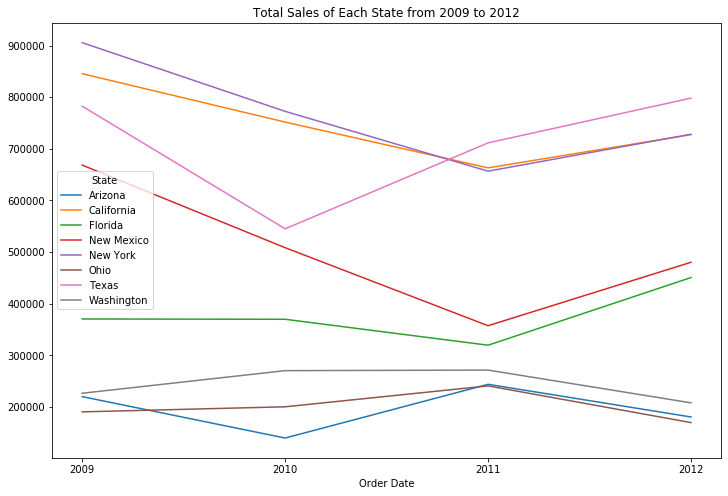

In [136]:
salesChart = SalesbyYear.plot(figsize = (12,8), title = 'Total Sales of Each State from 2009 to 2012',xticks=[ 2009,2010,2011,2012])

# salesChart.set_title  ('Total Sales of Each State from 2009 to 2012')
# salesChart.set_xlabel  ('Year')
# salesChart.set_ylabel  ('Sales')
# salesChart.set_xticks([ 2009,2010,2011,2012])

####here (figsize=(width,height), title='' )

Text(0.5, 0, ' prices')

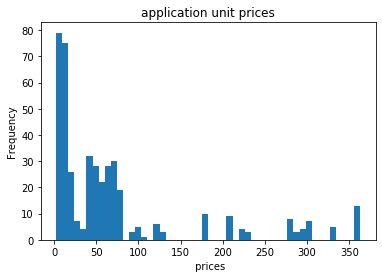

In [137]:
#5
mask=superstore[superstore['Product Sub-Category'] == 'Appliances']
A1=mask['Unit Price'].plot.hist(bins=50)

A1.set_title('application unit prices')
A1.set_xlabel(' prices')

[Text(0.5, 0, ' prices'), Text(0.5, 1.0, 'application unit prices')]

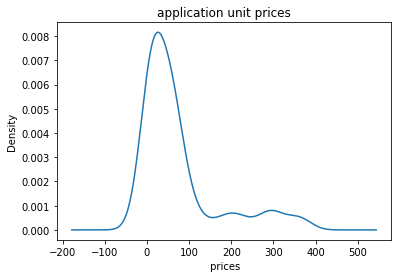

In [138]:
mask = superstore[superstore['Product Sub-Category'] == 'Appliances']
mask['Unit Price'].plot.density().set(title='application unit prices',xlabel=' prices') #here appunit is a mask
# A1.set_title('application unit prices')
# A1.set_xlabel(' prices')

In [139]:
import seaborn as sns


Text(0.5, 0, ' prices')

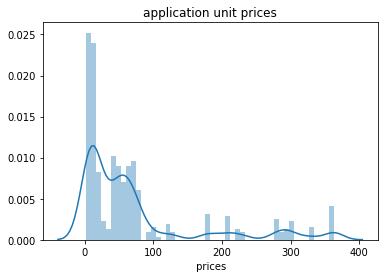

In [144]:
A2=sns.distplot(AppUnit['Unit Price'], bins = 50) #AppUnit is a mask
A2.plot(figsize=(10,12))
A2.set_title('application unit prices')
A2.set_xlabel(' prices')


In [147]:
#6.
TotalSaleCateg = superstore.pivot_table(index = 'State',columns = 'Product Category', values = 'Sales', aggfunc= 'sum')
TotalSaleCateg
#TotalSalesChart = TotalSaleCateg.plot.barh(figsize = (20,10), stacked = True)

Product Category,Furniture,Office Supplies,Technology
State,,,
Arizona,232619.084,170659.73,3.804745e+05
California,993915.924,681166.50,1.312990e+06
Florida,605784.144,351822.68,5.525883e+05
New Mexico,708726.782,478464.42,8.270570e+05
New York,1109617.500,927431.25,1.026164e+06
Ohio,282837.908,216848.93,3.011605e+05
Texas,919191.126,720090.43,1.198023e+06
Washington,335898.074,221978.16,4.179911e+05


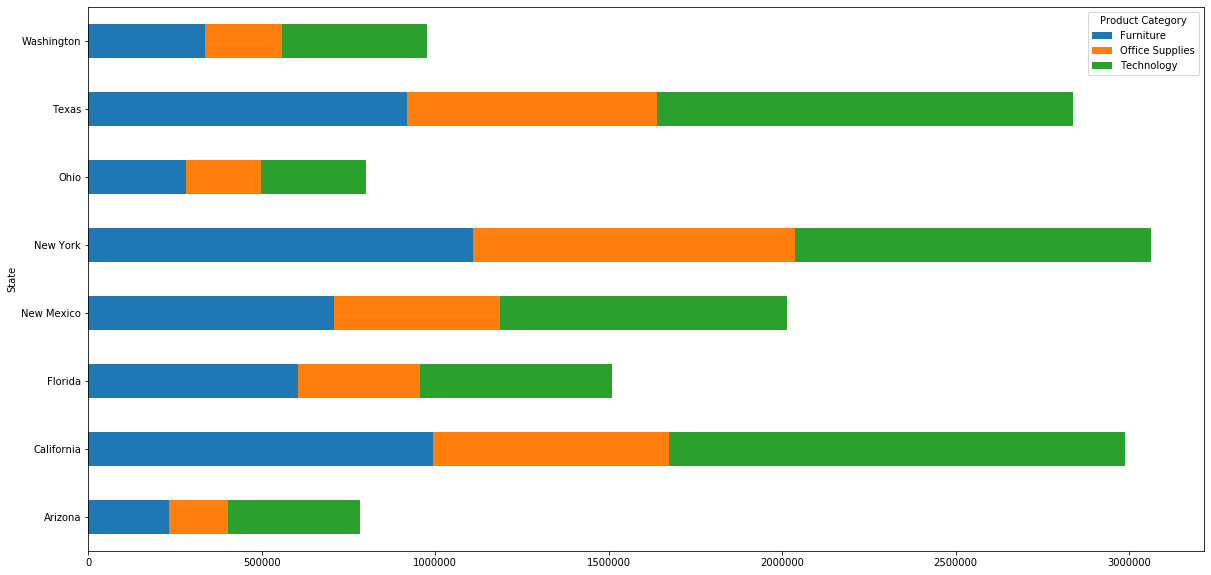

In [148]:
TotalSalesChart = TotalSaleCateg.plot.barh(figsize = (20,10), stacked = True)

In [146]:
#7.
mask=superstore['Order Date'].dt.year == 2011
Top10Cust = superstore[mask].groupby('Customer Name')['Sales'].sum().sort_values(ascending = False)
Top10Cust.head(10)
# #or

# Top10Cust = superstore[superstore['Order Date'].dt.year == 2011].groupby('Customer Name')['Sales'].sum().sort_values(ascending = False)
# Top10Cust.head(10)


Customer Name
Raymond Book         60370.2100
Grant Carroll        51311.3000
Jack O'Briant        48410.4640
Deborah Brumfield    46997.4565
Tony Chapman         37044.7870
Steve Chapman        34093.3800
Nick Crebassa        29186.4900
Lisa DeCherney       28120.3345
Cindy Schnelling     27748.7955
Eleni McCrary        26913.6900
Name: Sales, dtype: float64

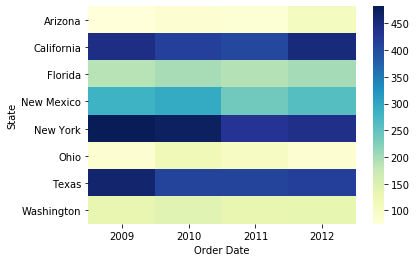

In [149]:
#8.
NoOfOrders=superstore.pivot_table(index = 'State',columns = superstore['Order Date'].dt.year, values = 'Order ID', aggfunc= 'count')
sns.heatmap(NoOfOrders, cmap = 'YlGnBu') #sns.heatmap(df,cmap='')
# Newyork has most orders placed in year 2009

In [ ]:
#9.
mask = (superstore['Sales'] >= 50) & (superstore['Sales'] <= 500)
Salesbtw = superstore[mask]
shipcost = Salesbtw['Shipping Cost'].sum()
sales = Salesbtw['Sales'].sum()
amount = shipcost / sales
amount

[Text(0, 0.5, 'Discount Rate'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Discount Rates by Product Category')]

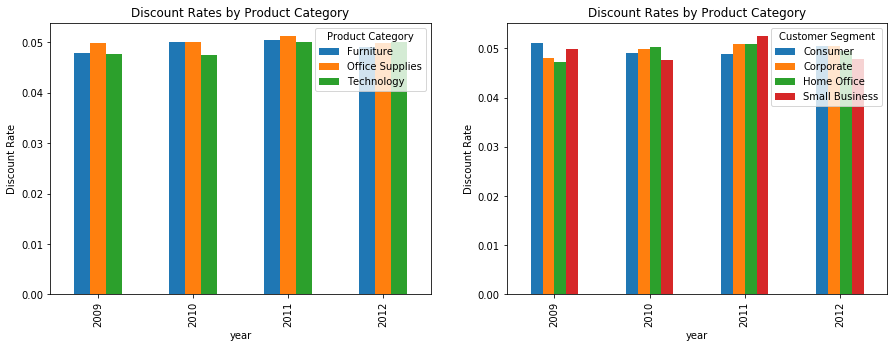

In [152]:
#10.

import matplotlib.pyplot as plt
Avg_dis1=superstore.pivot_table('Discount',index=superstore['Order Date'].dt.year,columns='Product Category',aggfunc='mean')
Avg_dis2=superstore.pivot_table('Discount',index=superstore['Order Date'].dt.year,columns='Customer Segment',aggfunc='mean')

fig, ax=plt.subplots(1,2,figsize=(15,5))
Avg_dis1.plot.bar(ax=ax[0]).set(title='Discount Rates by Product Category',xlabel='year',ylabel='Discount Rate')
Avg_dis2.plot.bar(ax=ax[1]).set(title='Discount Rates by Product Category',xlabel='year',ylabel='Discount Rate')

# ax[0].set_title('Discount Rates by Product Category')
# ax[0].set_xlabel('year')
# ax[0].set_ylabel('Discount Rate')

# ax[1].set_title('Discount Rates by customer Segment')
# ax[1].set_xlabel('year')
# ax[1].set_ylabel('Discount Rate')
##what is discByCust.plot.bar(ax=axes[0]/axes[1], title='') ax=axes[0] or axes[1] for axes[0]/axes[1]th position on subplot